In [201]:
import utils
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapely
import contextily as cx

In [202]:
_, jams = utils.load_data()

In [203]:
jams.line

0        [{'x': -70.399254, 'y': -23.652352}, {'x': -70...
1        [{'x': -70.380121, 'y': -23.570454}, {'x': -70...
2        [{'x': -70.39178, 'y': -23.641992}, {'x': -70....
3        [{'x': -70.400993, 'y': -23.64724}, {'x': -70....
4        [{'x': -70.402302, 'y': -23.65233}, {'x': -70....
                               ...                        
29053    [{'x': -70.397396, 'y': -23.649461}, {'x': -70...
29054    [{'x': -70.411653, 'y': -23.680939}, {'x': -70...
29055    [{'x': -70.377172, 'y': -23.635576}, {'x': -70...
29056    [{'x': -70.375854, 'y': -23.583896}, {'x': -70...
29057    [{'x': -70.395194, 'y': -23.661709}, {'x': -70...
Name: line, Length: 29058, dtype: object

In [204]:
shapely.geometry.LineString({(0, 0), (1, 1), (2, 2)})
jams.line[0][0].values()

dict_values([-70.399254, -23.652352])

In [205]:
lines = []

for line in jams.line:
    lines.append(shapely.geometry.LineString([l.values() for l in line]))

lines[:5]


[<LINESTRING (-70.399 -23.652, -70.4 -23.653, -70.401 -23.654, -70.401 -23.65...>,
 <LINESTRING (-70.38 -23.57, -70.379 -23.57, -70.379 -23.57, -70.378 -23.57, ...>,
 <LINESTRING (-70.392 -23.642, -70.391 -23.641, -70.391 -23.64)>,
 <LINESTRING (-70.401 -23.647, -70.401 -23.648, -70.4 -23.649, -70.399 -23.64...>,
 <LINESTRING (-70.402 -23.652, -70.402 -23.653, -70.401 -23.653, -70.401 -23....>]

In [206]:
jams['geometry'] = lines

In [207]:
jams.head()

,country,level,city,line,speedKMH,length,turnType,uuid,endNode,speed,segments,roadType,delay,street,id,pubMillis,endreport,blockingAlertUuid,startNode,geometry
0,CI,4,Antofagasta,"[{'x': -70.399254, 'y': -23.652352}, {'x': -70...",7.16,460,NONE,1865151336,Av. Grecia,1.988889,"[{'fromNode': 154041881, 'ID': 146613604, 'toN...",2,168,Manuel Antonio Matta,1865151336,1724422622058,1.724425e+12,NaN,NaN,"LINESTRING (-70.399254 -23.652352, -70.400116 ..."
1,CI,2,Antofagasta,"[{'x': -70.380121, 'y': -23.570454}, {'x': -70...",8.14,289,NONE,1873528430,Hilda Cruz Colina,2.261111,"[{'fromNode': 325756858, 'ID': 424309812, 'toN...",1,74,Félix García,1873528430,1724424984813,1.724425e+12,NaN,NaN,"LINESTRING (-70.380121 -23.570454, -70.379359 ..."
2,CI,3,Antofagasta,"[{'x': -70.39178, 'y': -23.641992}, {'x': -70....",4.85,261,NONE,1874194098,Buenos Aires,1.347222,"[{'fromNode': 156882036, 'ID': 153183588, 'toN...",1,138,Caracoles,1874194098,1724425158457,1.724425e+12,NaN,NaN,"LINESTRING (-70.39178 -23.641992, -70.39138 -2..."
3,CI,2,Antofagasta,"[{'x': -70.400993, 'y': -23.64724}, {'x': -70....",7.89,426,NONE,1874163736,Carlos Condell,2.191667,"[{'fromNode': 163164452, 'ID': 162892853, 'toN...",2,92,Maipú,1874163736,1724425158013,1.724425e+12,NaN,NaN,"LINESTRING (-70.400993 -23.64724, -70.400528 -..."
4,CI,4,Antofagasta,"[{'x': -70.402302, 'y': -23.65233}, {'x': -70....",5.27,206,NONE,1869436380,Manuel Antonio Matta,1.463889,"[{'fromNode': 163785101, 'ID': 164443929, 'toN...",1,109,Copiapó,1869436380,1724423844413,1.724425e+12,NaN,NaN,"LINESTRING (-70.402302 -23.65233, -70.401754 -..."


In [208]:
jams_filtered = jams[['speedKMH', 'level', 'length', 'street', 'delay', 'pubMillis', 'endreport', 'geometry']]

In [209]:
jams_filtered.head()

,speedKMH,level,length,street,delay,pubMillis,endreport,geometry
0,7.16,4,460,Manuel Antonio Matta,168,1724422622058,1.724425e+12,"LINESTRING (-70.399254 -23.652352, -70.400116 ..."
1,8.14,2,289,Félix García,74,1724424984813,1.724425e+12,"LINESTRING (-70.380121 -23.570454, -70.379359 ..."
2,4.85,3,261,Caracoles,138,1724425158457,1.724425e+12,"LINESTRING (-70.39178 -23.641992, -70.39138 -2..."
3,7.89,2,426,Maipú,92,1724425158013,1.724425e+12,"LINESTRING (-70.400993 -23.64724, -70.400528 -..."
4,5.27,4,206,Copiapó,109,1724423844413,1.724425e+12,"LINESTRING (-70.402302 -23.65233, -70.401754 -..."


In [210]:
jams_geo = gpd.GeoDataFrame(jams_filtered, geometry='geometry')
jams_geo = jams_geo.set_crs(epsg=4326)
jams_geo = jams_geo.to_crs(epsg=3857)
jams_geo.head()

,speedKMH,level,length,street,delay,pubMillis,endreport,geometry
0,7.16,4,460,Manuel Antonio Matta,168,1724422622058,1.724425e+12,"LINESTRING (-7836809.108 -2711102.546, -783690..."
1,8.14,2,289,Félix García,74,1724424984813,1.724425e+12,"LINESTRING (-7834679.232 -2701152.733, -783459..."
2,4.85,3,261,Caracoles,138,1724425158457,1.724425e+12,"LINESTRING (-7835977.106 -2709843.563, -783593..."
3,7.89,2,426,Maipú,92,1724425158013,1.724425e+12,"LINESTRING (-7837002.692 -2710481.305, -783695..."
4,5.27,4,206,Copiapó,109,1724423844413,1.724425e+12,"LINESTRING (-7837148.409 -2711099.872, -783708..."


Text(0.5, 1.0, 'Congestión en Antofagasta')

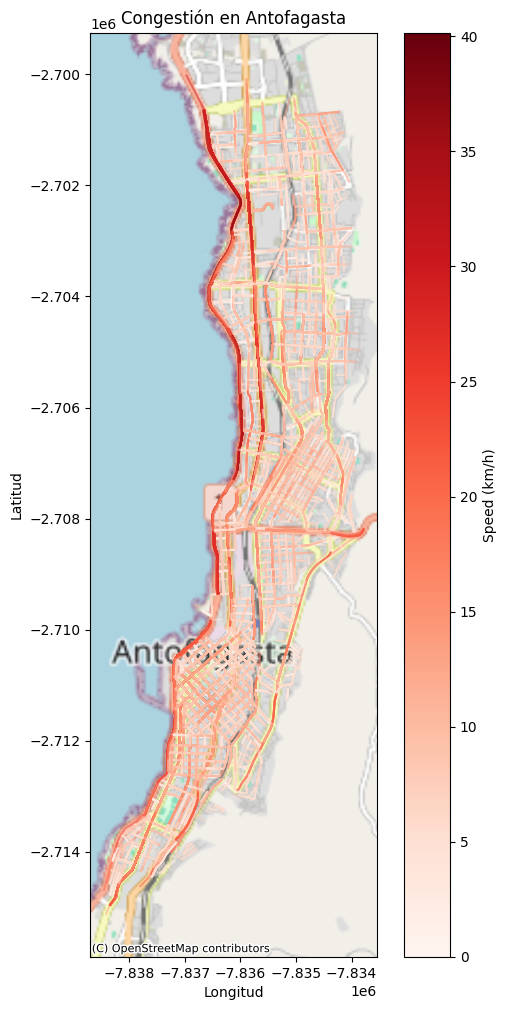

In [211]:

fig, ax = plt.subplots()
fig.set_size_inches((7, 12))
jams_geo.plot(ax=ax, column='speedKMH', legend=True, legend_kwds={'label': "Speed (km/h)"}, alpha=0.5, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Congestión en Antofagasta')

Text(0.5, 1.0, 'Congestión en Antofagasta')

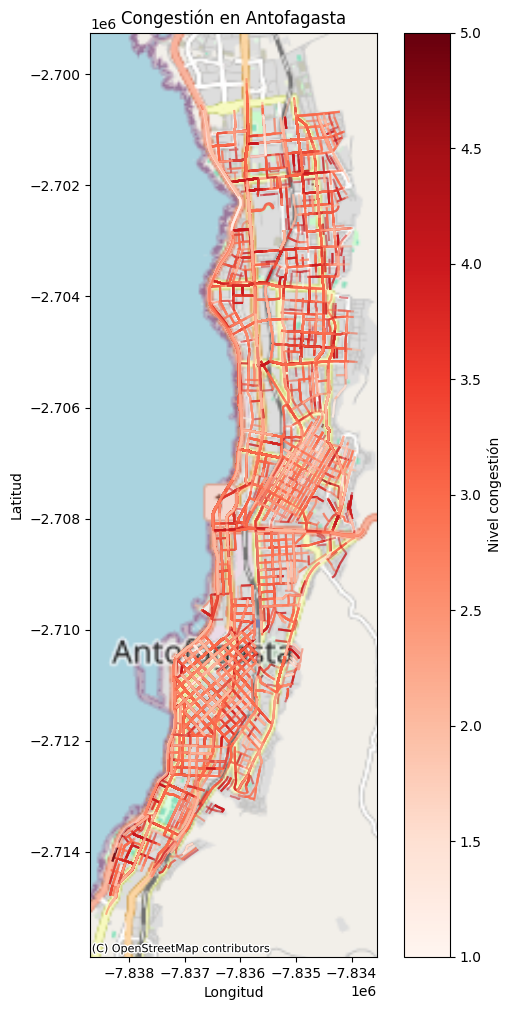

In [212]:
fig, ax = plt.subplots()
fig.set_size_inches((7, 12))
jams_geo.plot(ax=ax, column='level', legend=True, legend_kwds={'label': "Nivel congestión"}, alpha=0.5, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Congestión en Antofagasta')

In [213]:
jams_geo['street'].value_counts()[:10]

street
Av. Óscar Bonilla              1128
Av. Pedro Aguirre Cerda         915
14 de Febrero                   839
Av. Iquique                     758
Av. Edmundo Pérez Zujovic       732
José Santos Ossa                701
Luis Uribe                      683
Manuel Antonio Matta            680
Av. Huamachuco                  644
Almirante Juan José Latorre     632
Name: count, dtype: int64

In [214]:
jams_count = jams_geo[['street']].groupby('street').size().reset_index(name='count')
jams_count = jams_count.sort_values(by='count', ascending=False)
jams_count = pd.merge(jams_count, jams_geo[['street', 'geometry']], on='street')
jams_count = gpd.GeoDataFrame(jams_count, geometry='geometry')

Text(0.5, 1.0, 'Congestión en Antofagasta')

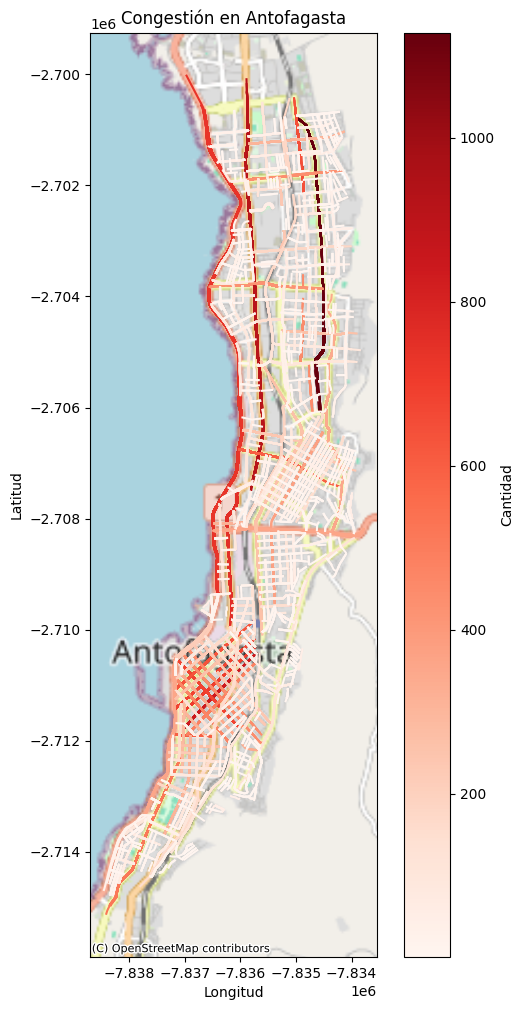

In [215]:
fig, ax = plt.subplots()
fig.set_size_inches((7, 12))
jams_count.plot(ax=ax, column='count', legend=True, legend_kwds={'label': "Cantidad"}, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Congestión en Antofagasta')

In [216]:
jams_avg = jams_geo[['speedKMH', 'level', 'street']].groupby('street').mean().reset_index()
jams_avg = pd.merge(jams_avg, jams_geo[['street', 'geometry']], on='street', how='left')
jams_avg = gpd.GeoDataFrame(jams_avg, geometry='geometry')

Text(0.5, 1.0, 'Congestión en Antofagasta')

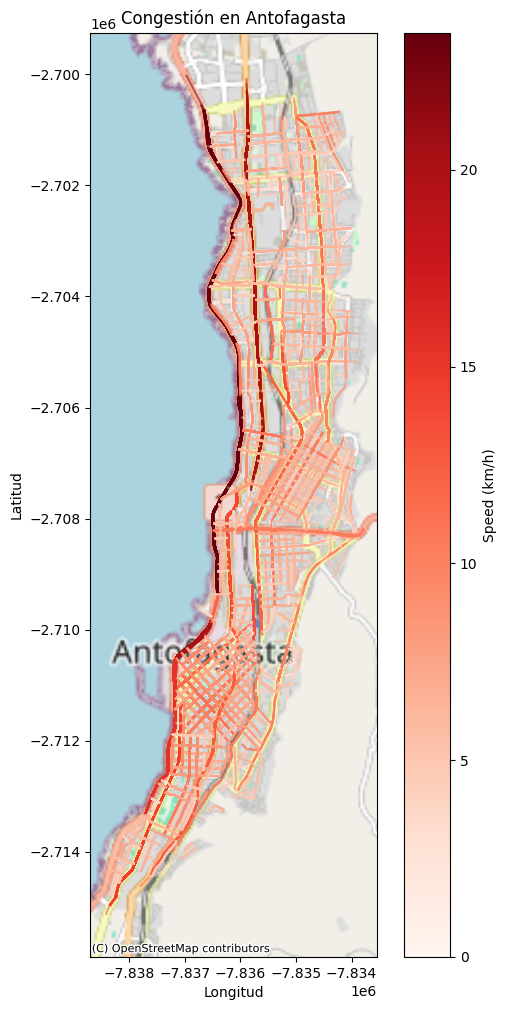

In [217]:
fig, ax = plt.subplots()
fig.set_size_inches((7, 12))
jams_avg.plot(ax=ax, column='speedKMH', legend=True, legend_kwds={'label': "Speed (km/h)"}, alpha=0.5, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Congestión en Antofagasta')

Text(0.5, 1.0, 'Congestión en Antofagasta')

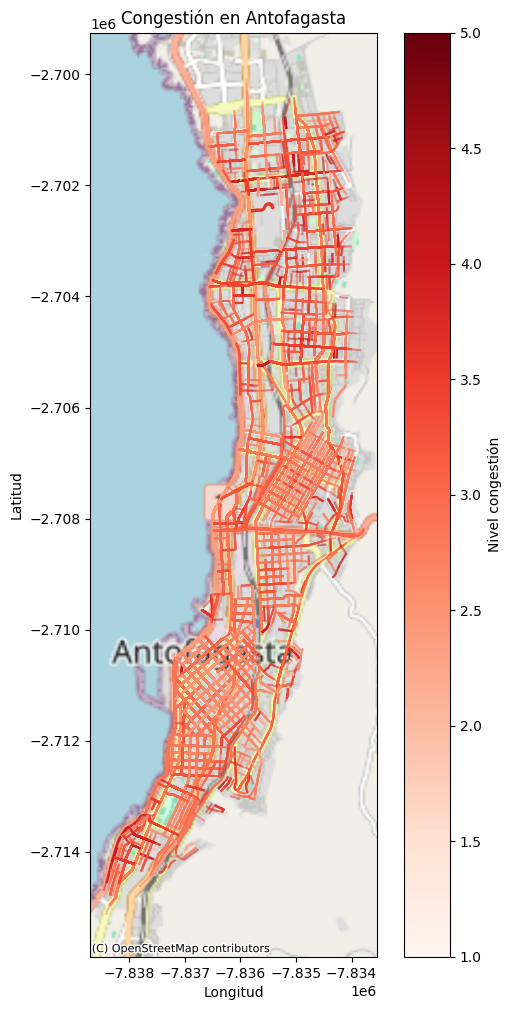

In [218]:
fig, ax = plt.subplots()
fig.set_size_inches((7, 12))
jams_avg.plot(ax=ax, column='level', legend=True, legend_kwds={'label': "Nivel congestión"}, alpha=0.5, cmap='Reds')
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik, zoom=12)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Congestión en Antofagasta')